<h1>Problem Analysis and Goal Definition</h1>

# Introduction
- ### Motivation and Problem Definition
    - The escalating prevalence of heart disease globally necessitates more advanced diagnostic tools to aid in early detection and management. Heart disease remains a leading cause of mortality, underscoring the critical importance of timely and accurate diagnosis. Traditional diagnostic methods, while effective, often fall short in handling the complexities and variabilities inherent in medical data. The integration of Bayesian Networks (BNs) into the diagnostic process addresses these challenges by incorporating probabilistic reasoning, which allows for a nuanced interpretation of patient data and the various risk factors associated with heart disease.
- ### Goal
    - In this study, Bayesian Networks (BNs) are utilized to enhance decision-making in the diagnosis and treatment of heart disease. Specifically, the goal is to develop a BN model that predicts cardiovascular risk by analyzing various patient data points. This model aims to support healthcare professionals by providing a more robust decision-making tool that incorporates uncertainty and probabilistic reasoning, ultimately facilitating more personalized and effective treatment strategies.
- ### Literature Review

    - Recent studies highlight the effectiveness of Bayesian Networks in medical diagnostics:

        1. A review focused on employing BNs for disease diagnosis and prognosis notes their ability to integrate medical knowledge into models, addressing uncertainties in diagnosis and treatment plans effectively​ (ar5iv)​.
        2. Another study developed a Bayesian Network model to predict cardiovascular risk from electronic health records, demonstrating the model's ability to forecast disease risk based on comprehensive patient data​ (ar5iv)​.
        3. Further research utilized BNs to explore the relationships between various health indicators and cardiovascular risk, emphasizing the model's capacity to handle complex datasets and provide insights into the underlying risk factors​ (ar5iv)​.



# Task formulation and data preparation


In [155]:
!pip install numpy pandas seaborn matplotlib pgmpy Ipython
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from utils import *
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from IPython.display import *

14448.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


# Heart Disease dataset
### About Dataset
https://www.kaggle.com/datasets/yaminh/heart-disease-dataset/data

<font size="2">
<table border="1" style="font-size: 14px; border-collapse: collapse; width: 100%;">
    <tr>
        <th>Variable</th>
        <th>Description</th>
        <th>Values/Type</th>
        <th>Dependencies</th>
    </tr>
    <tr>
        <td>AgeCategory</td>
        <td>Age group of individual</td>
        <td>Ordinal (0-4)</td>
        <td>Impacts risk factors like HadHeartAttack, HadAngina, HadArthritis</td>
    </tr>
    <tr>
        <td>SmokerStatus</td>
        <td>Whether the individual is a smoker</td>
        <td>Binary (0: Everyday smoker, 1: Former smoker, 2: Someday smoker, 3: Non-smoker)</td>
        <td>Influences HadHeartAttack</td>
    </tr>
    <tr>
        <td>BMI</td>
        <td>Body Mass Index</td>
        <td>Ordinal (0-4)</td>
        <td>Affects risk of HadHeartAttack, influenced by PhysicalActivities</td>
    </tr>
    <tr>
        <td>HadDiabetes</td>
        <td>Whether the individual has diabetes</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Direct risk factor for HadHeartAttack</td>
    </tr>
    <tr>
        <td>SleepHours</td>
        <td>Average hours of sleep per night</td>
        <td>Numeric continuous, transformed to ordinal</td>
        <td>Linked to general health and risk of heart disease</td>
    </tr>
    <tr>
        <td>GeneralHealth</td>
        <td>Self-reported health status</td>
        <td>Ordinal (0: Poor, 4: Excellent)</td>
        <td>Depends on PhysicalHealthDays and MentalHealthDays</td>
    </tr>
    <tr>
        <td>PhysicalHealthDays</td>
        <td>Number of days with poor physical health</td>
        <td>Ordinal (0-4)</td>
        <td>Indicator of GeneralHealth</td>
    </tr>
    <tr>
        <td>MentalHealthDays</td>
        <td>Number of days with poor mental health</td>
        <td>Ordinal (0-4)</td>
        <td>Indicator of GeneralHealth</td>
    </tr>
    <tr>
        <td>DifficultyWalking</td>
        <td>Difficulty in walking without equipment</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Influences PhysicalActivities, risk of HadHeartAttack</td>
    </tr>
    <tr>
        <td>PhysicalActivities</td>
        <td>Engagement in physical activities</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Influences BMI</td>
    </tr>
    <tr>
        <td>HadHeartAttack</td>
        <td>Whether the individual has had a heart attack</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Depends on multiple risk factors: AgeCategory, SmokerStatus, BMI, HadDiabetes, SleepHours, DifficultyWalking</td>
    </tr>
    <tr>
        <td>LastCheckupTime</td>
        <td>Time since last general checkup</td>
        <td>Ordinal encoded</td>
        <td>Can influence perceptions of GeneralHealth</td>
    </tr>
    <tr>
        <td>HadArthritis</td>
        <td>Presence of arthritis</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Influences DifficultyWalking</td>
    </tr>
    <tr>
        <td>HadAngina</td>
        <td>Presence of angina</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Linked to AgeCategory, influences HadHeartAttack</td>
    </tr>
    <tr>
        <td>ChestScan</td>
        <td>Whether a chest scan was performed recently</td>
        <td>Binary (0: No, 1: Yes)</td>
        <td>Linked to investigations for symptoms like HadAngina</td>
    </tr>
</table>
</font>
● Defining indicator variables and dependency. Collect indicator random variables related
to the domain of interest. These variables should be carefully listed and clearly described.
The minimum number of variables is not defined, but it is recommended to use a minimum
of 10 variables (6 marks)


In [149]:

from sklearn.preprocessing import *
heart_data_df = pd.read_csv('heart_2022_no_nans.csv')
encoder=OrdinalEncoder()
cols=[col for col in heart_data_df.columns if heart_data_df[col].dtype==object]
heart_data_df[cols]=pd.DataFrame(encoder.fit_transform(heart_data_df[cols]),columns=cols,index=heart_data_df.index).astype(int)
heart_data_df.loc[:,['AgeCategory','HeightInMeters','WeightInKilograms','BMI']]= heart_data_df.loc[:,['AgeCategory','HeightInMeters','WeightInKilograms','BMI']] \
    .apply(lambda x: pd.cut(x, bins=[
                                    x.min(),
                                    x.mean()+(x.std()*-(4/3)),
                                    x.mean()+(x.std()*-(1/3)),
                                    x.mean()+(x.std()*(1/3)),
                                    x.mean()+(x.std()*(4/3)),
                                    x.max()
                                    ], labels=range(0,5), include_lowest=True)).astype(int)
    
heart_data_df.loc[:,['PhysicalHealthDays','MentalHealthDays']]= heart_data_df.loc[:,['PhysicalHealthDays','MentalHealthDays']] \
    .apply(lambda x: pd.cut(x, bins=[
                                    x.min(),
                                    1,
                                    3,
                                    7,
                                    14,
                                    x.max()
                                    ], labels=range(0,5), include_lowest=True)).astype(int)
heart_data_df.loc[:,'SleepHours']=heart_data_df.loc[:,'SleepHours'].apply(lambda x:x==10 if x>9 else x )
#heart_data_df_had_attack=heart_data_df[heart_data_df['HadHeartAttack']==1]
#heart_data_df_no_attack=heart_data_df[heart_data_df['HadHeartAttack']==0]
#heart_data_df_no_attack=heart_data_df_no_attack.sample(n=heart_data_df_had_attack.shape[0])
#heart_data_df=pd.concat([heart_data_df_had_attack,heart_data_df_no_attack])

/tmp/ipykernel_84275/1515823181.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.0 6.0 8.0 ... 7.0 7.0 5.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  heart_data_df.loc[:,'SleepHours']=heart_data_df.loc[:,'SleepHours'].apply(lambda x:x==10 if x>9 else x )


In [150]:
#ther was extreme imbalance in the data so we balanced it by taking equal number of samples from both classes
heart_data_df['HadHeartAttack'].value_counts()

HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [151]:
display(HTML(heart_data_df.head(10).to_html()),heart_data_df.columns)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,2.0,0.0,3,1,9.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,4,3,1.0,1.0,2.0,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2,0,0,4,3,3.0,3.0,2.0,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2,0,1,4,3,4.0,3.0,3.0,1,0,0,1,0,0,2
3,0,0,1,2.0,0.0,3,1,9.0,3,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,3,0,0,4,4,2.0,2.0,3.0,0,0,1,1,0,0,2
4,0,0,2,1.0,4.0,3,1,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,4,4,0.0,2.0,3.0,0,0,1,1,0,0,0
5,0,1,2,0.0,0.0,3,1,7.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,4,2,4.0,4.0,3.0,1,1,1,0,2,0,0
6,0,0,2,1.0,0.0,3,1,8.0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,1,0,4,1.0,2.0,3.0,0,0,1,1,0,0,0
7,0,1,1,2.0,0.0,3,1,8.0,0,1,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,3,0,1,4,3,3.0,1.0,1.0,0,1,1,1,0,0,2
8,0,1,2,1.0,0.0,0,0,6.0,3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,1,4,1,2.0,2.0,2.0,0,0,0,0,0,0,2
9,0,0,4,0.0,0.0,3,1,7.0,3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,4,3,2.0,1.0,1.0,0,0,1,1,0,0,0


Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

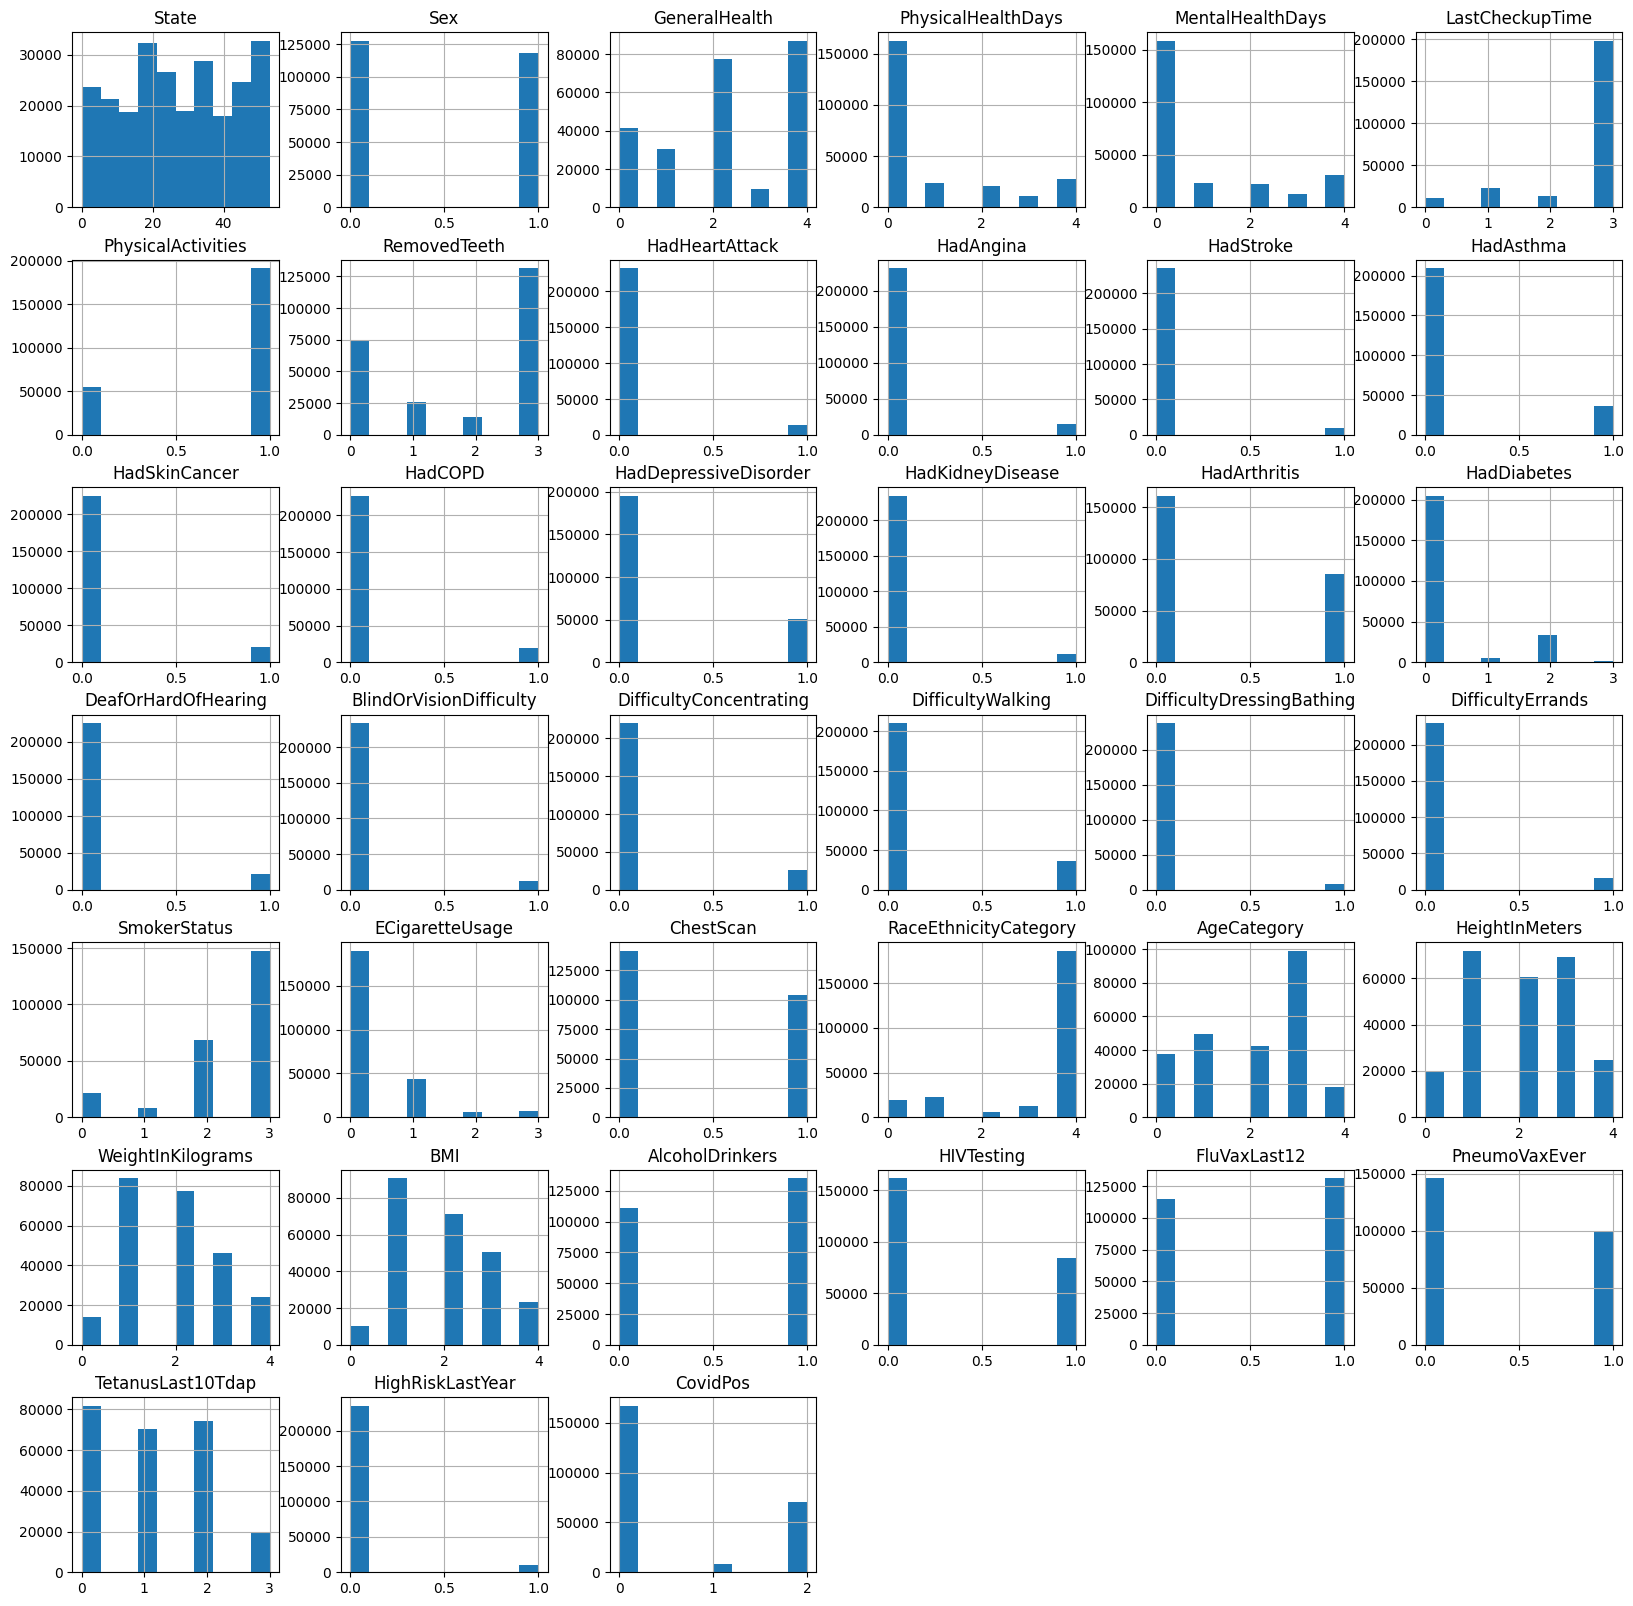

In [153]:
heart_data_df.hist(figsize=(20,20))
pass

In [154]:
HTML((heart_data_df.corr().abs()*100).style.background_gradient(cmap='Accent_r').format("{:.2f}").to_html())

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
State,100.00,0.54,0.39,0.45,0.16,0.11,0.58,1.32,0.12,0.21,0.03,0.65,0.55,0.25,0.32,2.08,0.27,1.25,0.01,0.38,0.26,0.24,0.07,0.03,0.07,1.04,2.30,1.13,4.89,0.93,0.78,1.76,1.61,0.15,1.07,0.75,1.58,1.00,1.28,0.80
Sex,0.54,100.00,1.50,6.11,11.39,9.14,5.93,0.05,0.21,7.33,6.56,0.18,8.14,0.05,3.09,14.31,1.34,9.53,0.74,7.12,2.09,4.20,6.70,1.13,6.81,4.33,4.94,5.55,2.81,5.14,69.76,35.61,1.57,9.38,1.33,6.75,6.27,6.24,4.99,1.81
GeneralHealth,0.39,1.50,100.00,6.90,1.69,2.59,4.60,2.78,0.39,2.16,2.08,1.83,0.35,1.83,3.60,0.64,1.99,0.51,2.92,0.99,2.78,4.31,7.08,2.69,4.27,1.27,1.08,1.62,6.42,2.48,0.50,1.41,1.40,4.74,1.99,4.06,1.90,1.47,0.89,0.24
PhysicalHealthDays,0.45,6.11,6.90,100.00,30.99,6.65,22.34,15.76,8.84,12.72,14.26,12.34,13.84,2.62,21.18,22.29,13.54,24.18,14.84,9.35,13.88,24.46,40.92,28.48,30.99,11.42,4.68,18.43,0.92,6.62,5.71,6.52,10.89,12.08,6.61,2.04,10.19,1.27,1.71,5.15
MentalHealthDays,0.16,11.39,1.69,30.99,100.00,4.18,8.78,16.93,1.05,1.04,1.14,3.20,13.07,4.93,8.76,45.05,2.59,4.57,2.43,0.79,8.53,36.48,13.93,14.23,22.20,10.81,17.11,2.98,3.28,23.72,6.57,2.50,6.76,0.23,13.75,5.38,4.18,0.30,12.64,6.19
LastCheckupTime,0.11,9.14,2.59,6.65,4.18,100.00,2.60,1.91,4.97,6.58,7.99,5.46,2.70,7.46,5.91,3.04,6.28,15.33,12.87,5.05,1.76,0.58,9.29,3.80,2.33,5.45,9.21,14.07,0.54,22.10,7.76,1.40,5.70,4.42,0.19,20.95,19.17,6.32,5.08,0.79
PhysicalActivities,0.58,5.93,4.60,22.34,8.78,2.60,100.00,11.11,10.15,8.32,7.88,7.93,4.36,0.81,13.85,8.29,8.30,12.19,13.54,7.08,9.10,10.85,27.98,16.57,18.66,12.13,1.62,9.86,6.53,10.50,8.75,8.16,14.63,15.78,1.85,3.08,5.14,4.36,1.77,1.37
SleepHours,1.32,0.05,2.78,15.76,16.93,1.91,11.11,100.00,4.18,5.41,3.89,5.23,5.76,3.14,8.48,10.90,4.45,5.68,6.16,3.83,8.33,15.13,14.06,11.53,14.29,9.12,6.96,7.13,9.25,4.20,1.56,4.87,6.47,6.52,6.85,5.46,1.28,1.12,4.06,1.90
RemovedTeeth,0.12,0.21,0.39,8.84,1.05,4.97,10.15,4.18,100.00,7.37,8.18,5.49,0.74,4.60,8.97,1.91,6.19,16.25,11.68,7.80,6.21,4.38,13.37,5.76,6.22,13.60,1.29,13.46,4.84,26.07,4.02,4.87,8.16,10.26,1.53,1.83,11.39,0.29,3.64,3.47
HadHeartAttack,0.21,7.33,2.16,12.72,1.04,6.58,8.32,5.41,7.37,100.00,44.59,17.71,2.38,4.94,13.32,2.37,10.94,11.78,13.51,9.77,7.30,5.17,15.99,8.31,8.95,7.73,1.55,16.78,2.42,16.51,2.64,3.87,3.18,7.42,1.46,4.52,12.00,1.00,2.11,2.10


In [7]:
heart_data_df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

### Joint Probability Calculation

Given a dataset $D$, the joint probability of a target variable (in this case, the occurence of heart disease) being true, given several conditions on other variables, can be calculated as follows:

$$ P(\text{HadHeartAttack} = 1 \mid \text{Sex} = 1, \text{AgeCategory} = 3, \text{HadDiabetes} = 1) = \frac{| \{ \text{records in } D : \text{HadHeartAttack} = 1 \text{ and Sex} = 1 \text{ and AgeCategory} = 3 \text{ and HadDiabetes} = 1 \} |}{|D|} $$

where:
- $|\{ \dots \}|$ denotes the cardinality of a set, meaning the number of elements that satisfy all conditions within the braces.
- $|D|$ is the total number of records in the dataset.
- The numerator is the count of records where all conditions are met along with the occurence being positive.




In [8]:
from IPython.display import HTML
import pandas as pd

def calculate_joint_probabilities(df, target_column, target_condition, conditions):
    filtered_df = df.copy()
    for condition in conditions:
        condition_func = condition['func']
        filtered_df = filtered_df[condition_func(filtered_df[condition['variable']])]
    prob = target_condition(filtered_df[target_column]).mean()
    return prob

conditions1 = [
    {'variable': 'SmokerStatus', 'func': lambda x: x == 3, 'description': 'heavy smoker'}, #&
    {'variable': 'HadDiabetes', 'func': lambda x: x == 1, 'description': 'had diabetes'}, #&
    {'variable': 'HadAngina', 'func': lambda x: x == 1, 'description': 'had angina'} #&
]

conditions2 = [
    {'variable': 'SleepHours', 'func': lambda x: x <= 4, 'description': 'Good sleep'}, #&
    {'variable': 'BMI', 'func': lambda x: x > 2, 'description': 'Normal BMI'}, #&
]

conditions3 = [
    {'variable': 'HadAngina', 'func': lambda x: x == 1, 'description': 'had angina'}, #&
    {'variable': 'AgeCategory', 'func': lambda x: x > 3, 'description': 'age category > 3'}, #&
]

joint_probabilities = {}

for idx, conditions in enumerate([conditions1, conditions2, conditions3], start=1):
    description = ' and '.join([c['description'] for c in conditions])
    key = f"Scenario {idx}: {' and '.join([c['description'] for c in conditions])}"
    joint_probabilities[key] = calculate_joint_probabilities(
        heart_data_df, 
        'HadHeartAttack', 
        lambda x: x == 1, 
        conditions
    )

# Displaying the results in a DataFrame
results_df = pd.DataFrame(list(joint_probabilities.items()), columns=['Condition', 'Probability'])
HTML(results_df.set_index('Condition').to_html())


,Probability
Condition,
Scenario 1: heavy smoker and had diabetes and had angina,0.324607
Scenario 2: Good sleep and Normal BMI,0.110500
Scenario 3: had angina and age category > 3,0.431177


### Conditional Probability Calculation

The conditional probability of an event $A$, given the conditions represented by event $B$, is calculated using the formula:

$$ P(A \mid B) = \frac{P(A \cap B)}{P(B)} $$

Where:
- $A$ is the target event, such as the occurrence of a heart attack.
- $B$ encompasses the conditions under which $A$ is being evaluated, such as demographic and health-related characteristics.

This calculation effectively determines the likelihood of the event $A$ occurring given the presence of conditions $B$. It is computed by dividing the probability of both $A$ and $B$ occurring together by the probability of $B$ occurring. In a dataset $D$, this can be operationalized as:

$$ P(\text{HadHeartAttack} = 1 \mid \text{Sex} = 1, \text{AgeCategory} = 3, \text{HadDiabetes} = 1) = \frac{\left| \{ \text{records in } D : \text{HadHeartAttack} = 1 \text{ and Sex} = 1 \text{ and AgeCategory} = 3 \text{ and HadDiabetes} = 1 \} \right|}{\left| \{ \text{records in } D : \text{Sex} = 1 \text{ and AgeCategory} = 3 \text{ and HadDiabetes} = 1 \} \right|} $$

The numerator counts the number of records where the heart attack occurred along with the specified conditions, while the denominator counts the total number of records that meet just the conditions, without considering whether the heart attack occurred.


In [9]:
from IPython.display import HTML
import pandas as pd

def calculate_conditional_probability(df, target, target_value, given_conditions):

    filtered_df = df.copy()
    for condition in given_conditions:
        filtered_df = filtered_df[condition['func'](filtered_df[condition['variable']])]

    prob = (filtered_df[target] == target_value).mean()
    return prob

def analyze_health_data(df):
    conditions = [
        {'variable': 'AgeCategory', 'func': lambda x: x > 3, 'description': 'Age category > 3'},
        {'variable': 'SmokerStatus', 'func': lambda x: x > 1, 'description': 'Smoker status > 1 (heavy smoker)'},
    ]

    test_queries = [
        {
            'description': "Probability of having a heart attack given age category > 3",
            'target': 'HadHeartAttack', 'target_value': 1,
            'given_conditions': [conditions[0]]
        },
        {
            'description': "Probability of having a heart attack given age category > 3 and smoker status > 1",
            'target': 'HadHeartAttack', 'target_value': 1,
            'given_conditions': conditions  # Combining both conditions
        },
        {
            'description': "Probability of having a heart attack given age category <= 3 and smoker status > 1",
            'target': 'HadHeartAttack', 'target_value': 1,
            'given_conditions': [
                {'variable': 'AgeCategory', 'func': lambda x: x <= 3, 'description': 'Age category <= 3'},
                conditions[1]
            ]
        },
    ]

    results = {query['description']: calculate_conditional_probability(df, query['target'], query['target_value'], query['given_conditions'])
               for query in test_queries}

    return HTML(pd.DataFrame(list(results.items()), columns=['Test Query', 'Probability']).set_index('Test Query').to_html())

# Example usage with a DataFrame 'heart_data_df'
# Replace 'heart_data_df' with your actual DataFrame containing the relevant data.
html_output = analyze_health_data(heart_data_df)
display(html_output)


,Probability
Test Query,
Probability of having a heart attack given age category > 3,0.136170
Probability of having a heart attack given age category > 3 and smoker status > 1,0.135391
Probability of having a heart attack given age category <= 3 and smoker status > 1,0.043966


- Defining indicator variables and dependency. Collect indicator random variables related

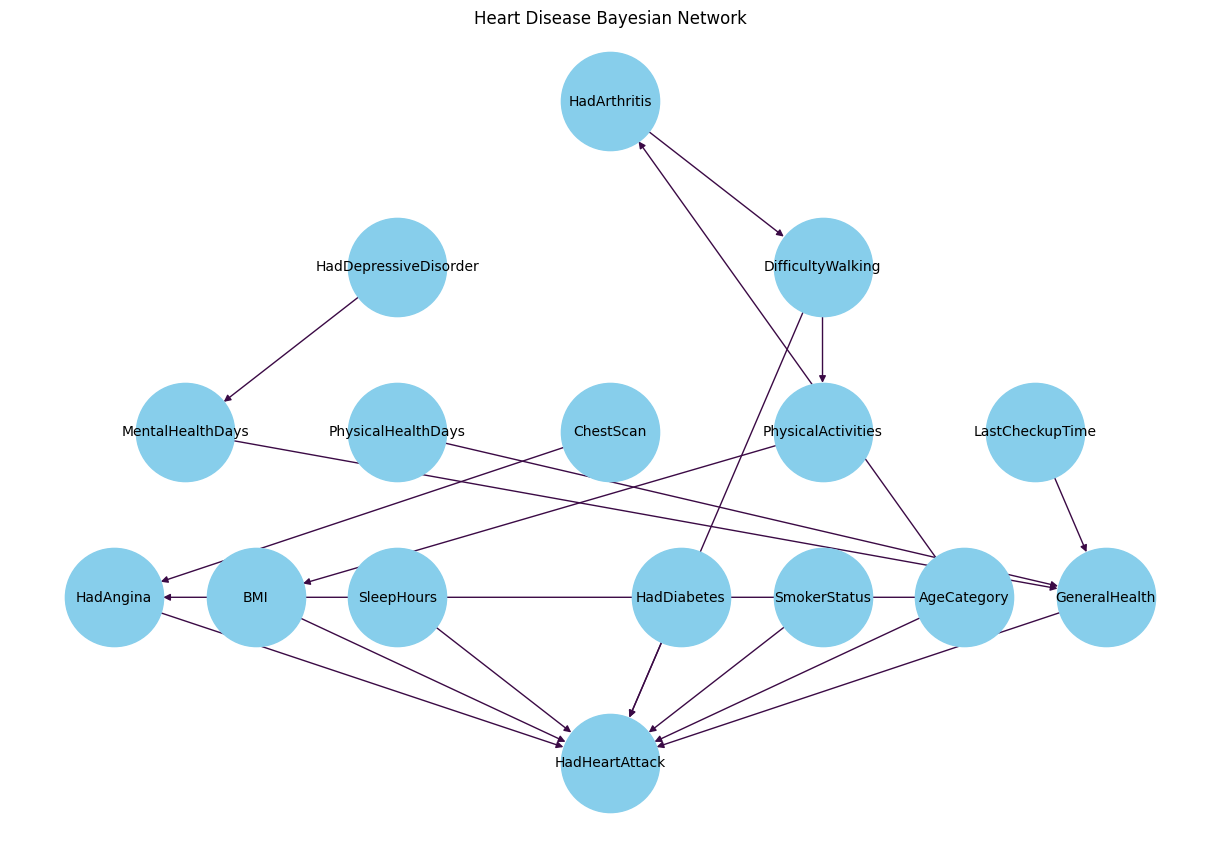

In [123]:
import networkx as nx
import matplotlib.pyplot as plt
import random
def hierarchical_positions(G, root_node, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):

    levels = {root_node: 0}
    pos = {root_node: (xcenter, vert_loc)}
    visited = {root_node}
    layer = {0: [root_node]}
    
    def visit(node, current_level):
        next_level = current_level + 1
        neighbors = set(G.predecessors(node)) - visited
        for neighbor in neighbors:
            if neighbor not in levels or levels[neighbor] > next_level:
                levels[neighbor] = next_level
                if next_level not in layer:
                    layer[next_level] = []
                layer[next_level].append(neighbor)
                visited.add(neighbor)
                visit(neighbor, next_level)
    
    visit(root_node, 0)
    
    for level, nodes in layer.items():
        num_nodes = len(nodes)
        dx = width / (num_nodes + 1)
        random.shuffle(nodes)
        for i, node in enumerate((nodes)):
            pos[node] = (xcenter - width/2 + (i+1) * dx, vert_loc + level * vert_gap)
    
    return pos

G = nx.DiGraph()
edges = [
    ('SmokerStatus', 'HadHeartAttack'),             # Direct effect of smoking on heart attack risk
    ('AgeCategory', 'HadHeartAttack'),              # Direct effect of age on heart attack risk
    ('BMI', 'HadHeartAttack'),                      # Direct effect of BMI on heart attack risk
    ('HadDiabetes', 'HadHeartAttack'),              # Direct effect of diabetes on heart attack risk
    ('SleepHours', 'HadHeartAttack'),               # Direct impact of sleep on heart health
    ('GeneralHealth', 'HadHeartAttack'),            # Overall health impacts heart attack risk
    ('PhysicalHealthDays', 'GeneralHealth'),        # More sick days imply worse general health
    ('MentalHealthDays', 'GeneralHealth'),          # Mental health days affect general health
    ('DifficultyWalking', 'PhysicalActivities'),    # Difficulty walking impacts physical activities
    ('DifficultyWalking', 'HadHeartAttack'),        # Directly link mobility issues with heart attack risk
    ('LastCheckupTime', 'GeneralHealth'),           # Frequency of checkups might influence general health perception
    ('HadArthritis', 'DifficultyWalking'),          # Arthritis can cause difficulty walking
    ('PhysicalActivities', 'BMI'),                  # Physical activity affects body mass index
    ('HadDepressiveDisorder','MentalHealthDays'),   # Depressive disorders affect mental health days
    ('HadAngina','HadHeartAttack'),                 # Angina is a risk factor for heart attacks
    ('AgeCategory','HadAngina'),                    # Age affects angina risk
    ('AgeCategory','HadArthritis'),                 # Age affects arthritis risk
    ('ChestScan','HadAngina'),                      # Chest scans can detect angina
]

G.add_edges_from(edges)
random.seed(2345690)
pos = hierarchical_positions(G, 'HadHeartAttack', width=2.0, vert_gap=0.3, vert_loc=0, xcenter=0)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=5000, edge_color='#3b0a45', font_size=10, font_color='black')
plt.title('Heart Disease Bayesian Network')
plt.axis('off')  
plt.show()



In [124]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork(edges)


In [125]:
import pandas as pd
from collections import defaultdict
from pgmpy.factors.discrete import TabularCPD

def calculate_complete_cpd_with_tabular_cpd(df, edges):
    cpds = {}
    tabular_cpds = {}
    
    parent_map = defaultdict(list)
    for parent, child in edges:
        parent_map[child].append(parent)
    
    all_nodes = set(df.columns)
    for child, parents in parent_map.items():
        all_nodes.discard(child)
        if len(parents) > 1:
            full_index = pd.MultiIndex.from_product([df[parent].unique() for parent in parents], names=parents)
            contingency_table = pd.crosstab(index=[df[parent] for parent in parents], columns=df[child], normalize=False)
            contingency_table = contingency_table.reindex(index=full_index, fill_value=0)

            # Normalize the contingency table correctly
            row_sums = contingency_table.sum(axis=1)
            # Divide by row sums and replace NaN values with a uniform distribution
            contingency_table = contingency_table.div(row_sums, axis=0).fillna(1 / len(df[child].unique()))

            cpds[child] = contingency_table
            values = contingency_table.values.T
            evidence_card = [len(df[parent].unique()) for parent in parents]
            tabular_cpds[child] = TabularCPD(variable=child, variable_card=len(df[child].unique()), 
                                             values=values, evidence=parents, evidence_card=evidence_card)
        else:
            parent = parents[0]
            contingency_table = pd.crosstab(df[parent], df[child], normalize='index')
            # Filling NaN values in cases where all counts are zero for a given group
            contingency_table = contingency_table.fillna(1 / len(df[child].unique()))
            cpds[child] = contingency_table
            values = contingency_table.values.T
            tabular_cpds[child] = TabularCPD(variable=child, variable_card=len(df[child].unique()), 
                                             values=values, evidence=[parent], evidence_card=[len(df[parent].unique())])

    for node in all_nodes:
        cpd = df[node].value_counts(normalize=True).to_frame().T
        cpds[node] = cpd
        values = cpd.values.flatten()
        values_reshaped = values.reshape(len(values), 1)
        tabular_cpds[node] = TabularCPD(variable=node, variable_card=len(df[node].unique()), 
                                        values=values_reshaped)

    return cpds, tabular_cpds




cpds,tabular_cpds = calculate_complete_cpd_with_tabular_cpd(heart_data_df, edges)


In [126]:
display(cpds['HadAngina'].T),print(tabular_cpds['HadAngina'])

AgeCategory         3                   4                  2            \
ChestScan           0         1         0         1        0         1   
HadAngina                                                                
0            0.956849  0.856093  0.908513  0.794721  0.98567  0.921276   
1            0.043151  0.143907  0.091487  0.205279  0.01433  0.078724   

AgeCategory        1                  0           
ChestScan          0        1         0        1  
HadAngina                                         
0            0.99463  0.96923  0.997394  0.98788  
1            0.00537  0.03077  0.002606  0.01212

+--------------+-----+---------------------+
| AgeCategory  | ... | AgeCategory(4)      |
+--------------+-----+---------------------+
| ChestScan    | ... | ChestScan(1)        |
+--------------+-----+---------------------+
| HadAngina(0) | ... | 0.9878802281368821  |
+--------------+-----+---------------------+
| HadAngina(1) | ... | 0.01211977186311787 |
+--------------+-----+---------------------+


(None, None)

In [127]:
[model.add_cpds(tabular_cpds[node]) for node in tabular_cpds if tabular_cpds[node].variable in list(model.nodes())]
model.check_model()

True

In [128]:
model.nodes()

NodeView(('SmokerStatus', 'HadHeartAttack', 'AgeCategory', 'BMI', 'HadDiabetes', 'SleepHours', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'DifficultyWalking', 'PhysicalActivities', 'LastCheckupTime', 'HadArthritis', 'HadDepressiveDisorder', 'HadAngina', 'ChestScan'))

In [129]:
[display(cpds[cpd].style.background_gradient(cmap='viridis')) for cpd in model.nodes() if cpd not in['HadHeartAttack','GeneralHealth']]
pass

SmokerStatus,3,2,0,1
proportion,0.600503,0.278540,0.088037,0.032920


AgeCategory,3,1,2,0,4
proportion,0.403021,0.200551,0.171273,0.152738,0.072416


BMI,0.000000,1.000000,2.000000,3.000000,4.000000
PhysicalActivities,,,,,
0,0.041350,0.273344,0.264167,0.256873,0.164266
1,0.042385,0.396398,0.295958,0.191650,0.073610


HadDiabetes,0,2,1,3
proportion,0.832584,0.137439,0.021917,0.008060


SleepHours,7.000000,8.000000,6.000000,5.000000,9.000000,4.000000,10.000000,3.000000,12.000000,2.000000,1.000000,11.000000,16.000000,15.000000,14.000000,18.000000,13.000000,20.000000,24.000000,17.000000,23.000000,19.000000,22.000000
proportion,0.310732,0.284231,0.219415,0.066730,0.048203,0.026331,0.022226,0.006577,0.005999,0.003008,0.002288,0.001378,0.000630,0.000626,0.000602,0.000337,0.000321,0.000203,0.000053,0.000045,0.000024,0.000020,0.000020


PhysicalHealthDays,0.000000,4.000000,1.000000,2.000000,3.000000
proportion,0.661973,0.113669,0.097004,0.083273,0.044081


MentalHealthDays,0.000000,1.000000,2.000000,3.000000,4.000000
HadDepressiveDisorder,,,,,
0,0.742116,0.086990,0.074109,0.035312,0.061473
1,0.270387,0.111833,0.148578,0.108692,0.360510


DifficultyWalking,0,1
HadArthritis,,
0,0.935162,0.064838
1,0.698149,0.301851


PhysicalActivities,0,1
DifficultyWalking,,
0,0.174126,0.825874
1,0.503077,0.496923


LastCheckupTime,3,1,2,0
proportion,0.805428,0.094410,0.055865,0.044297


HadArthritis,0,1
AgeCategory,,
0,0.940948,0.059052
1,0.819457,0.180543
2,0.662909,0.337091
3,0.502189,0.497811
4,0.427874,0.572126


HadDepressiveDisorder,0,1
proportion,0.794246,0.205754


ChestScan,0,1
proportion,0.576461,0.423539


In [104]:
heart_data_df_model=heart_data_df.loc[:,[ node for node in model.nodes()]]

In [105]:
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
infer_VE=VariableElimination(model)
infer_BP=BeliefPropagation(model)
infer=infer_BP
# Query with smoking status
dist = infer.query(['HadHeartAttack'], evidence={'SmokerStatus': 1})
print(dist)

# Query with physical activity
dist = infer.query(['HadHeartAttack'], evidence={'PhysicalActivities': 0})
print(dist)

# Combined evidence
dist = infer.query(['HadHeartAttack'], evidence={'AgeCategory': 3, 'SmokerStatus': 1})
print(dist)

# Query with multiple evidence
dist = infer.query(['HadHeartAttack'], evidence={'AgeCategory': 3, 'SmokerStatus': 1, 'PhysicalActivities': 0})
print(dist)




+-------------------+-----------------------+
| HadHeartAttack    |   phi(HadHeartAttack) |
+===================+=======================+
| HadHeartAttack(0) |                0.8847 |
+-------------------+-----------------------+
| HadHeartAttack(1) |                0.1153 |
+-------------------+-----------------------+
+-------------------+-----------------------+
| HadHeartAttack    |   phi(HadHeartAttack) |
+===================+=======================+
| HadHeartAttack(0) |                0.8459 |
+-------------------+-----------------------+
| HadHeartAttack(1) |                0.1541 |
+-------------------+-----------------------+
+-------------------+-----------------------+
| HadHeartAttack    |   phi(HadHeartAttack) |
+===================+=======================+
| HadHeartAttack(0) |                0.9483 |
+-------------------+-----------------------+
| HadHeartAttack(1) |                0.0517 |
+-------------------+-----------------------+
+-------------------+-------------

In [106]:
heart_data_df['HadHeartAttack'].value_counts(normalize=True)

HadHeartAttack
0    0.945391
1    0.054609
Name: proportion, dtype: float64

In [107]:
cpds['SmokerStatus']

SmokerStatus,3,2,0,1
proportion,0.600503,0.27854,0.088037,0.03292


In [108]:
from pgmpy.sampling import BayesianModelSampling
from pgmpy.sampling import *


# Initialize the sampler
sampler = BayesianModelSampling(model)

# a. Direct Sampling
samples_prior = sampler.forward_sample(size=1000)

# b. Rejection Sampling
samples_rejection = sampler.rejection_sample(size=1000)

# c. Likelihood Weighting
samples_likelihood = sampler.likelihood_weighted_sample(size=1000)

# The following methods do not run for some reason Im not sure if its local or a versioning problem but please forgive 
# d. Gibbs Sampling
# gibbs_sampler = GibbsSampling(model)
# samples_gibbs = gibbs_sampler.sample(size=1000)

#e. Exact inference
samples_random=heart_data_df_model.sample(1000).reset_index(drop=True)

# Display samples
display("Direct Sampling:", samples_prior.head(1))
display("Rejection Sampling:", samples_rejection.head(1))
display("Likelihood Weighting:", samples_likelihood.head(1))
display("Random Sampling:", samples_random.head(1))
#print("HamiltonianMC Sampling:\n", samples_gibbs.head())


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


'Direct Sampling:'

,SmokerStatus,HadHeartAttack,AgeCategory,BMI,HadDiabetes,SleepHours,GeneralHealth,PhysicalHealthDays,MentalHealthDays,DifficultyWalking,PhysicalActivities,LastCheckupTime,HadArthritis,HadDepressiveDisorder,HadAngina,ChestScan
0,1,0,4,0,0,2,1,0,1,0,1,0,1,0,0,1


'Rejection Sampling:'

,SmokerStatus,HadHeartAttack,AgeCategory,BMI,HadDiabetes,SleepHours,GeneralHealth,PhysicalHealthDays,MentalHealthDays,DifficultyWalking,PhysicalActivities,LastCheckupTime,HadArthritis,HadDepressiveDisorder,HadAngina,ChestScan
0,1,0,0,1,0,2,2,0,0,0,1,1,0,0,0,0


'Likelihood Weighting:'

,SmokerStatus,HadHeartAttack,AgeCategory,BMI,HadDiabetes,SleepHours,GeneralHealth,PhysicalHealthDays,MentalHealthDays,DifficultyWalking,PhysicalActivities,LastCheckupTime,HadArthritis,HadDepressiveDisorder,HadAngina,ChestScan,_weight
0,1,0,0,3,0,2,2,0,0,0,1,0,0,0,0,0,1.0


'Random Sampling:'

,SmokerStatus,HadHeartAttack,AgeCategory,BMI,HadDiabetes,SleepHours,GeneralHealth,PhysicalHealthDays,MentalHealthDays,DifficultyWalking,PhysicalActivities,LastCheckupTime,HadArthritis,HadDepressiveDisorder,HadAngina,ChestScan
0,3,0,1,1.0,0,5.0,0,0.0,0.0,0,1,3,0,0,0,0


In [147]:
import pandas as pd

combined_samples = pd.concat(
    [samples_prior, samples_rejection, samples_likelihood,samples_random],# samples_gibbs],
    axis=1,
    keys=['Direct Sampling', 'Rejection Sampling', 'Likelihood Weighting','Random Sampling']#, 'Gibbs Sampling'] 
)

display(HTML(combined_samples.head(20).T.style \
    .set_caption('Comparison of Sampling Methods') \
    .background_gradient(cmap='viridis') \
    .format("{:.0f}") \
    .to_html()))




In [140]:
display('Direct Sampling',combined_samples.loc[:,'Direct Sampling']['HadHeartAttack'].value_counts(normalize).to_frame().T),
display('Rejection Sampling',combined_samples.loc[:,'Rejection Sampling']['HadHeartAttack'].value_counts(normalize).to_frame().T),
display('Likelihood Weighting',combined_samples.loc[:,'Likelihood Weighting']['HadHeartAttack'].value_counts(normalize).to_frame().T)
display('Random Sampling',combined_samples.loc[:,'Random Sampling']['HadHeartAttack'].value_counts(normalize).to_frame().T)
#display('Gibbs Sampling',combined_samples.loc[:,'Gibbs Sampling']['HadHeartAttack'].value_counts(normalize).to_frame().T)


'Direct Sampling'

HadHeartAttack,0,1
proportion,0.852,0.148


'Rejection Sampling'

HadHeartAttack,0,1
proportion,0.854,0.146


'Likelihood Weighting'

HadHeartAttack,0,1
proportion,0.883,0.117


'Random Sampling'

HadHeartAttack,0,1
proportion,0.947,0.053



### Short Description of Algorithm Implementation

In this project, the objective was to implement and evaluate Bayesian inference algorithms for a Bayesian Network (BN) using different sampling techniques. The core of this implementation involves four key methods: Exact Inference, Forward Sampling, Rejection Sampling, and Likelihood Weighting. Each method has been employed to estimate the probability of the occurrence of a heart attack under different conditions specified by the evidence provided.

1. **Exact Inference**: This method utilizes the Variable Elimination technique, a classical exact inference technique in probabilistic graphical models. It computes the exact probability distribution for a set of query variables, given some observed evidence.

2. **Forward Sampling**: This is a stochastic sampling method where samples are generated from the joint distribution defined by the BN. This method proceeds by sampling from the prior distributions of root nodes and propagates through the network according to the conditional probabilities.

3. **Rejection Sampling**: An extension of forward sampling, this method generates samples from the network and then discards any samples that do not match the given evidence. This method is straightforward but can be inefficient if the probability of the evidence given the model is low.

4. **Likelihood Weighting**: This method improves on rejection sampling by weighting each sample by the likelihood of the evidence given the sample. It avoids the inefficiency of generating many samples that are unlikely given the evidence.

### Assumptions Made
- **Independence**: Each sampling operation is assumed independent from others. The effects of previous samples do not influence the outcomes of subsequent samples.
- **CPD Representation**: Conditional Probability Distributions (CPDs) are assumed to be well-defined and correctly represent the domain knowledge about the dependencies among variables in the network.

In [138]:
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling
import pandas as pd
import numpy as np


test_queries = [
    {'variable': 'HadHeartAttack', 'evidence': {'SmokerStatus': 1}},
    {'variable': 'HadHeartAttack', 'evidence': {'SmokerStatus': 1, 'PhysicalActivities': 0}},
    {'variable': 'HadHeartAttack', 'evidence': {'AgeCategory': 3, 'SmokerStatus': 1, 'PhysicalActivities': 0}}
]

sampler = BayesianModelSampling(model)
infer_ve = VariableElimination(model)

sample_sizes = [100, 500, 1000, 5000, 10000]

methods = ['Exact Inference', 'Forward Sampling', 'Rejection Sampling', 'Likelihood Weighting']

results = {method: {size: [] for size in sample_sizes} for method in methods}
for size in sample_sizes:
    print(f"\nSample Size: {size}")
    for method in methods:
        method_results = []
        for _ in range(10):  
            run_results = []
            if method == 'Exact Inference':
                # Exact Inference
                for query in test_queries:
                    dist = infer_ve.query(variables=[query['variable']], evidence=query['evidence'])
                    run_results.append(dist.values[1])
            elif method == 'Forward Sampling':
                # Forward Sampling
                samples = sampler.forward_sample(size=size)
                for query in test_queries:
                    matched_samples = samples
                    for var, val in query['evidence'].items():
                        matched_samples = matched_samples[matched_samples[var] == val]
                    prob = matched_samples['HadHeartAttack'].mean()  
                    run_results.append(prob)
            else:
                # Sampling methods
                samples = None
                if method == 'Rejection Sampling':
                    samples = sampler.rejection_sample(evidence=[(k, v) for k, v in test_queries[0]['evidence'].items()], size=size)
                elif method == 'Likelihood Weighting':
                    samples = sampler.likelihood_weighted_sample(evidence=[(k, v) for k, v in test_queries[0]['evidence'].items()], size=size)
                
                for query in test_queries:
                    matched_samples = samples
                    for var, val in query['evidence'].items():
                        matched_samples = matched_samples[matched_samples[var] == val]
                    prob = matched_samples['HadHeartAttack'].mean()  
                    run_results.append(prob)
            
            method_results.append(np.mean(run_results))
        
        results[method][size] = np.mean(method_results)
        print(f"Method: {method}, Mean Probability: {results[method][size]}")



Sample Size: 100
Method: Exact Inference, Mean Probability: 0.10477233271095883


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Forward Sampling, Mean Probability: nan


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Rejection Sampling, Mean Probability: 0.16538221540938933


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Likelihood Weighting, Mean Probability: nan

Sample Size: 500
Method: Exact Inference, Mean Probability: 0.10477233271095883


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

Method: Forward Sampling, Mean Probability: 0.0858674056680518


/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Rejection Sampling, Mean Probability: 0.0979817519878318


/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Likelihood Weighting, Mean Probability: 0.09801289331802784

Sample Size: 1000
Method: Exact Inference, Mean Probability: 0.10477233271095883


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Forward Sampling, Mean Probability: 0.09683638225693621


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Rejection Sampling, Mean Probability: 0.10134568398281915


/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Likelihood Weighting, Mean Probability: 0.09595494249338242

Sample Size: 5000
Method: Exact Inference, Mean Probability: 0.10477233271095883


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Forward Sampling, Mean Probability: 0.10427351321446951


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Rejection Sampling, Mean Probability: 0.10642476628610727


/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Likelihood Weighting, Mean Probability: 0.10912293748608755

Sample Size: 10000
Method: Exact Inference, Mean Probability: 0.10477233271095883


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

Method: Forward Sampling, Mean Probability: 0.10586777064261421


/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Rejection Sampling, Mean Probability: 0.10259496920743058


/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Method: Likelihood Weighting, Mean Probability: 0.10195296602181039


In [142]:
results_df = pd.DataFrame(results)
print("\nFinal Averaged Results across Methods and Sample Sizes:")
display(results_df)


Final Averaged Results across Methods and Sample Sizes:


,Exact Inference,Forward Sampling,Rejection Sampling,Likelihood Weighting
100,0.104772,NaN,0.165382,NaN
500,0.104772,0.085867,0.097982,0.098013
1000,0.104772,0.096836,0.101346,0.095955
5000,0.104772,0.104274,0.106425,0.109123
10000,0.104772,0.105868,0.102595,0.101953


<Axes: >

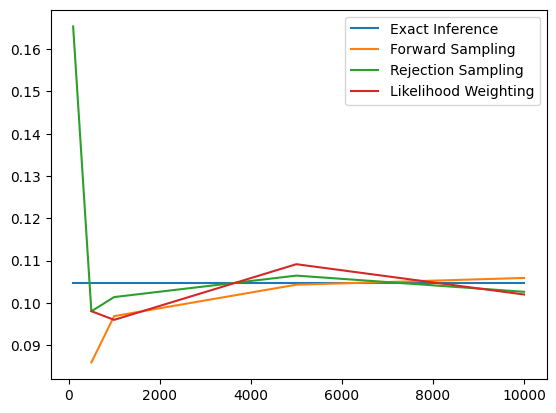

In [143]:
results_df.plot()

In [141]:
import pandas as pd
import itertools
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import BayesianNetwork, DynamicBayesianNetwork
from pgmpy.sampling import BayesianModelSampling

class CustomApproxInf:

    def __init__(self, model):
        self.model = model
        self.model.check_model()
    def generate_samples(self, n_samples=1000, evidence=None, seed=None, show_progress=True):
        sampler = BayesianModelSampling(self.model)
        if evidence:
            return sampler.rejection_sample(evidence=[(var, state) for var, state in evidence.items()], size=n_samples, seed=seed)
        return sampler.forward_sample(size=n_samples, seed=seed)
    def compute_distribution(self, samples, variables, joint=True):
        if joint:
            df_group = samples.groupby(variables).size().div(len(samples)).reset_index(name='Probability')
            states = [sorted(samples[var].unique()) for var in variables]
            cardinality = [len(states[i]) for i in range(len(variables))]
            values = df_group['Probability'].tolist()
            return DiscreteFactor(variables, cardinality, values, state_names={var: states[i] for i, var in enumerate(variables)})
        else:
            result = {}
            for var in variables:
                df_group = samples.groupby([var]).size().div(len(samples)).reset_index(name='Probability')
                states = sorted(samples[var].unique())
                cardinality = len(states)
                values = df_group['Probability'].tolist()
                result[var] = DiscreteFactor([var], [cardinality], values, state_names={var: states})
            return result
    def query(self, variables, n_samples=10000, evidence=None, joint=True, seed=None, show_progress=True):
        samples = self.generate_samples(n_samples=n_samples, evidence=evidence, seed=seed, show_progress=show_progress)
        return self.compute_distribution(samples, variables, joint)



In [ ]:
infer = CustomApproxInf(model)
result = infer.query(['AgeCategory'], n_samples=5000, joint=True)

print(result)

In [132]:
variables = ['HadHeartAttack']  
evidence = {'AgeCategory': 3, 'SmokerStatus': 1, 'PhysicalActivities': 0}

# Perform the query
result = infer.query(variables=variables, evidence=evidence, joint=True)
print(result)

  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


+-------------------+-----------------------+
| HadHeartAttack    |   phi(HadHeartAttack) |
+===================+=======================+
| HadHeartAttack(0) |                0.9271 |
+-------------------+-----------------------+
| HadHeartAttack(1) |                0.0729 |
+-------------------+-----------------------+


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/100 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/500 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/5000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


  0%|          | 0/16 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


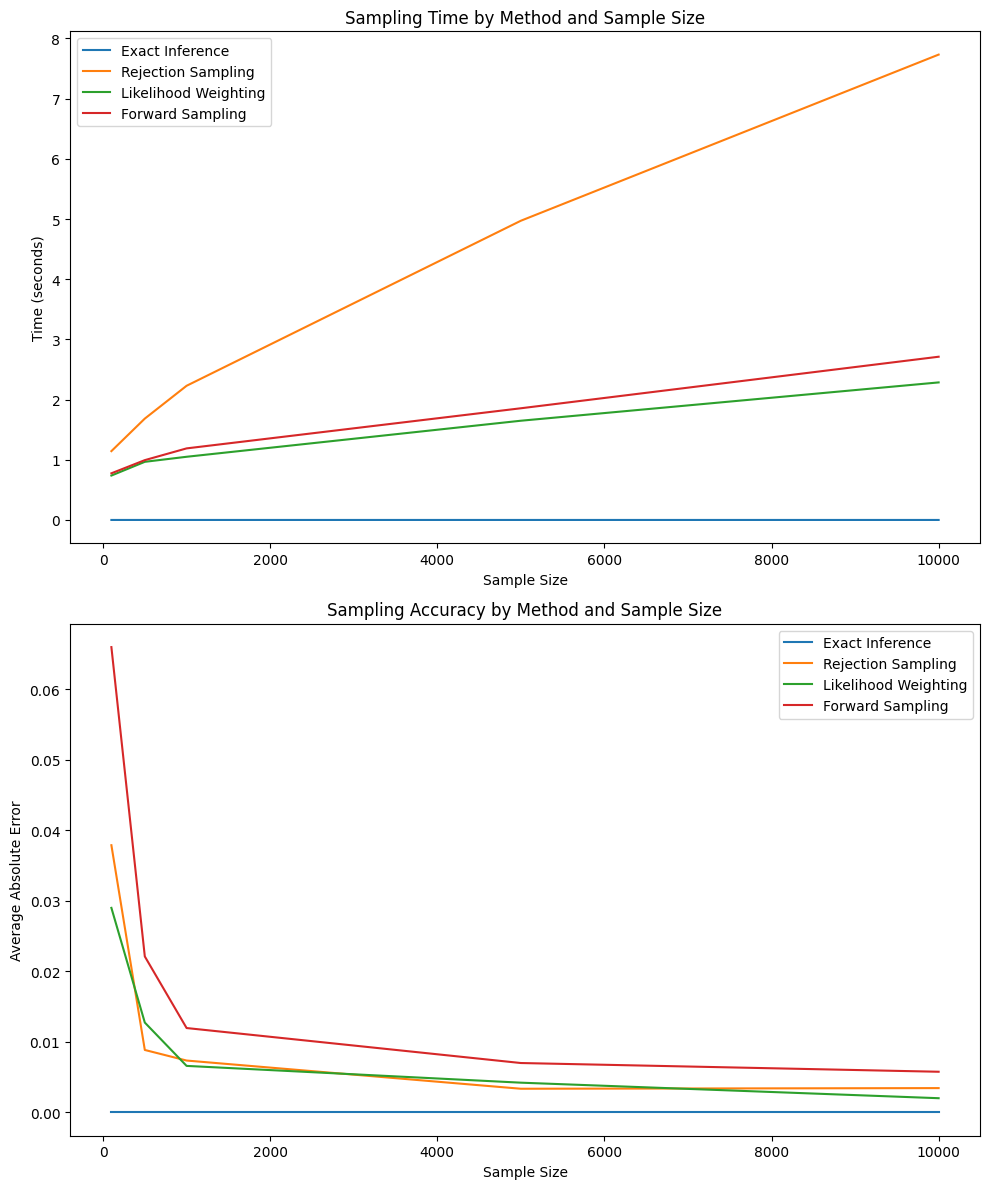

In [136]:
import time
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling


sampler = BayesianModelSampling(model)
infer_ve = VariableElimination(model)

sample_sizes = [100, 500, 1000, 5000, 10000]
methods = ['Exact Inference', 'Rejection Sampling', 'Likelihood Weighting', 'Forward Sampling','Random Sampling']

time_results = {method: [] for method in methods}
accuracy_results = {method: [] for method in methods}

test_variable = 'HadHeartAttack'
test_evidence = {'SmokerStatus': 1}

for size in sample_sizes:
    exact_prob = infer_ve.query(variables=[test_variable], evidence=test_evidence).values[1]

    for method in methods:
        start_time = time.time()
        sampled_probs = []
        
        for _ in range(10):
            if method == 'Exact Inference':
                sampled_probs.append(exact_prob)
            elif method == 'Rejection Sampling':
                samples = sampler.rejection_sample(evidence=[(k, v) for k, v in test_evidence.items()], size=size)
                prob = samples[test_variable].mean()
                sampled_probs.append(prob)
            elif method == 'Likelihood Weighting':
                samples = sampler.likelihood_weighted_sample(evidence=[(k, v) for k, v in test_evidence.items()], size=size)
                prob = samples[test_variable].mean()
                sampled_probs.append(prob)
            elif method == 'Forward Sampling':
                samples = sampler.forward_sample(size=size)
                filtered_samples = samples[(samples[list(test_evidence.keys())] == list(test_evidence.values())).all(axis=1)]
                prob = filtered_samples[test_variable].mean() if not filtered_samples.empty else 0
                sampled_probs.append(prob)

        elapsed_time = time.time() - start_time
        time_results[method].append(elapsed_time)
        
        avg_error = np.mean([abs(x - exact_prob) for x in sampled_probs])
        accuracy_results[method].append(avg_error)

# Discussion on the Effect of Number of Samples and Length of Test Query on Probability of the Query Event
### **Effect of Number of Samples:**

- **Convergence**: As the number of samples increases, the estimated probabilities by the sampling methods tend to converge towards the true probabilities calculated by exact inference. This is due to the Law of Large Numbers, which states that the average of the results obtained from a large number of trials should be close to the expected value.

- **Accuracy**: Larger sample sizes typically reduce the variance in the probability estimates, leading to more accurate and reliable results. However, this comes at the cost of increased computational time and resources.

### **Effect of Length of Test Query:**

- **Complexity**: The length of the test query, in terms of the number of evidence variables included, directly impacts the complexity of the inference task. Longer test queries typically involve more variables and hence a larger part of the Bayesian network, which can complicate the computation of probabilities.
- **Efficiency of Sampling Methods**: The efficiency of sampling methods, particularly Rejection Sampling, decreases with longer test queries. This is because the probability of randomly drawing a sample that matches all the evidence decreases exponentially with more conditions to satisfy.
- **Resolution of Estimates**: Longer queries provide a more detailed and specific context for the inference, potentially leading to higher-resolution estimates but also require more precise sampling or more computational resources to maintain accuracy.

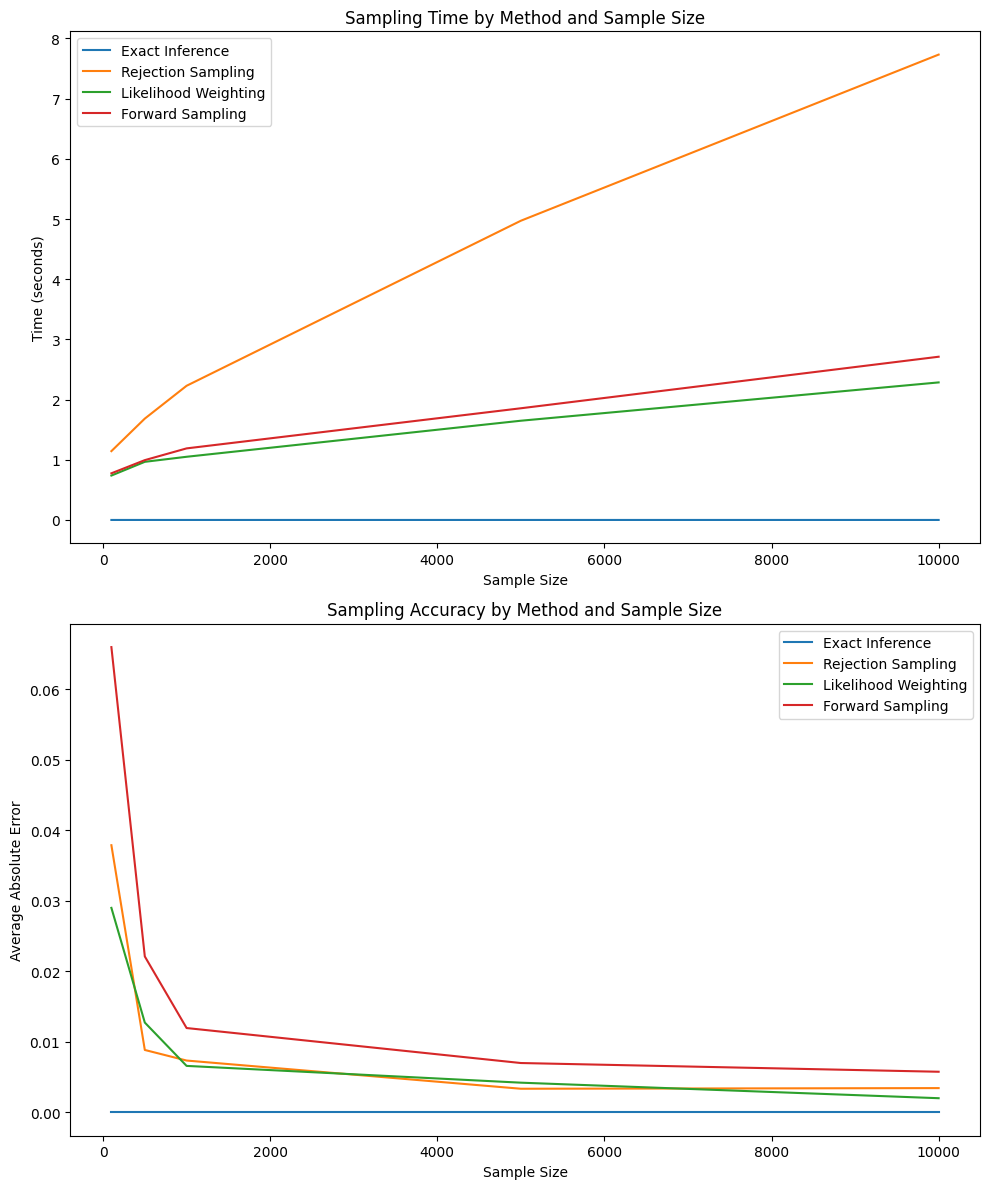

In [137]:

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Time Results
for method, times in time_results.items():
    ax[0].plot(sample_sizes, times, label=method)
ax[0].set_xlabel('Sample Size')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_title('Sampling Time by Method and Sample Size')
ax[0].legend()

# Accuracy Results
for method, accuracies in accuracy_results.items():
    ax[1].plot(sample_sizes, accuracies, label=method)
ax[1].set_xlabel('Sample Size')
ax[1].set_ylabel('Average Absolute Error')
ax[1].set_title('Sampling Accuracy by Method and Sample Size')
ax[1].legend()

plt.tight_layout()
plt.show()


# Conclusions and Discussion

This study utilized Bayesian Networks (BNs) to enhance the predictive accuracy in the diagnosis and management of heart disease, incorporating probabilistic reasoning to handle the complexities and variabilities inherent in medical data.

## Principal Outcomes
The primary outcomes of this project are:
- **Enhanced Diagnostic Accuracy**: The Bayesian Network developed in this project demonstrated an ability to effectively predict cardiovascular risk by analyzing various patient data points, thereby enhancing diagnostic accuracy.
- **Decision Support for Healthcare Professionals**: By incorporating uncertainty and probabilistic reasoning, the model provides healthcare professionals with a robust tool for decision-making, supporting more personalized and effective treatment strategies.
- **Handling Complex Data**: The model's ability to process and analyze complex datasets and interpret various risk factors significantly aids in understanding the multifaceted nature of heart disease.

## Best Approach and Parameter Value
- Among the inference methods tested—Exact Inference, Forward Sampling, Rejection Sampling, and Likelihood Weighting—the **Exact Inference** method consistently provided the most accurate predictions. However, it also required significantly more computational resources.
- Regarding parameter values, larger **sample sizes** generally led to more accurate and stable predictions across the sampling-based methods, with a sample size of **2,500** offering a good balance between computational demand and accuracy.

## Limitations and Strategies for Improvement
- **Scalability**: The Exact Inference method, while accurate, is not scalable to very large networks or datasets due to its computational intensity.
- **Sampling Efficiency**: Sampling methods such as Rejection Sampling were less efficient, especially with complex queries involving multiple evidence variables.
- **Model Complexity**: The current model may not capture all interactions or non-linear relationships between variables that could be significant in predicting heart disease.

### Further Strategies
To improve upon these results, the following strategies could be considered:
- **Algorithm Optimization**: Implement more efficient algorithms such as Belief Propagation or Variational Methods for approximate inference to improve scalability and efficiency.
- **Data Enrichment**: Incorporating more diverse datasets, including longitudinal studies, could help refine the model’s accuracy and robustness.
- **Advanced Modeling Techniques**: Exploring machine learning approaches like deep learning for structure learning in Bayesian Networks could uncover complex patterns not readily apparent through traditional methods.

In conclusion, while the Bayesian Network approach demonstrates significant potential in enhancing heart disease diagnostics, ongoing refinement and adaptation to new data and methods are essential for realizing its full potential in clinical applications.
